In [70]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
from scipy.fft import rfft, rfftfreq

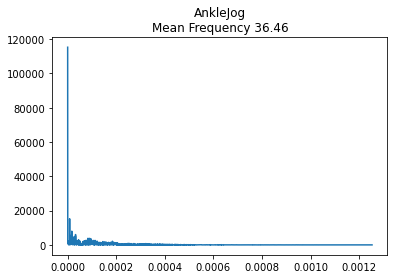

Max amplitude: 87.57


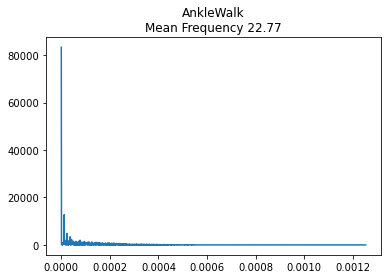

Max amplitude: 52.36


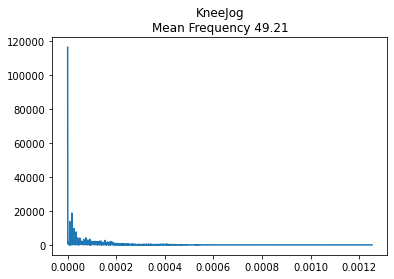

Max amplitude: 97.61


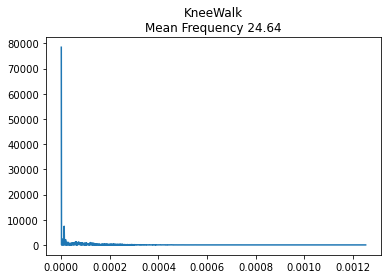

Max amplitude: 37.68


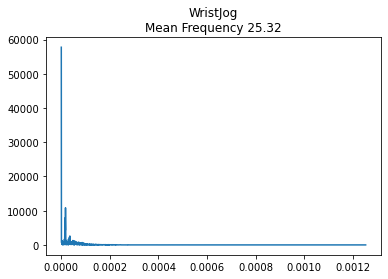

Max amplitude: 43.09


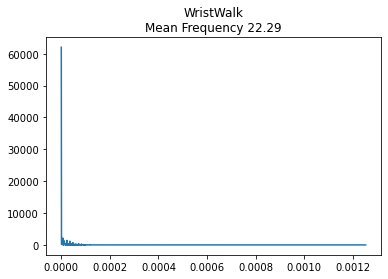

Max amplitude: 18.56


In [71]:
for f in glob('data\steven\*.csv'):
        df = pd.read_csv(f)
        cols = ['Acceleration x (m/s^2)', 'Acceleration y (m/s^2)',
                'Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']
        q1, q2 = df['Time (s)'].quantile([.2, .7])
        df_trimmed = df[(df['Time (s)']>= q1) & (df['Time (s)'] <= q2)]
        #rolling = df_trimmed['Absolute acceleration (m/s^2)'].rolling(100).mean()

        left = 'data\steven\\'
        right = '_'
        N = len(df_trimmed)
        SAMPLE_RATE = df_trimmed['Time (s)'].diff().mean()
        yf = rfft(df_trimmed['Absolute acceleration (m/s^2)'].values).real
        xf = rfftfreq(N, 1 / SAMPLE_RATE)
        plt.plot(xf, np.abs(yf))
        plt.title(f[f.index(left)+len(left):f.index(right)] + '\nMean Frequency ' + str(np.round(np.mean(yf),2)))
        plt.show()

        print('Max amplitude:', np.round(df_trimmed['Absolute acceleration (m/s^2)'].max(), 2))